<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/%5BNH%5D_Python_for_Topic_Modelling_(ALL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !python --version

**Downgrade the current version of Python, if necessary**

In [ ]:
  !wget https://www.python.org/ftp/python/3.6.9/Python-3.6.9.tgz 
  !tar xvfz Python-3.6.9.tgz
  !Python-3.6.9/configure
  !make
  !sudo make install

In [ ]:
!python --version #recheck it!

##**Source code:** 
  * **Topic Modeling on Spanish Texts 코드 변형**
    * https://medium.com/@armandj.olivares/topic-modeling-on-spanish-text-f7a5e998fb90

    * https://github.com/ArmandDS/topic_modeling/blob/master/topic_modeling_spanish.ipynb


  * **Create topics and classifying spanish documents using Gensim and Spacy**

    * In this article we will implementing topics model with gensim, topic models are 
probabilistic models which contains information about topics in the
text. A topic is like theme, or in other words underlying ideas represented in text. 
For example, we are working with a corpus of **spanish newspaper articles**,
possible topics would be  politics, conflicts, elections and so on.



**Load the libraries.**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

**Connect to drive to get the data.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

**Analisis de Co-ocurrencia para todas las obras poeticas de Antonio Machado (solo libros)** 
  * csv 파일 업로드 후 진행하기!

In [ ]:
df_news = pd.read_csv("a-machado-(CLEAN)-Revisado3-(solo libros)-nuevo.csv")
df_news.head(20)

,Unnamed: 0,autor,libro,metaTL,poema,fragmento,destinatario,texto,AA#1-Espasa(1989)-Roman num.,AA#2-Espasa(1989)-Arabian num.,MM#1-Etc.,MM#2-Etc.,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,50101,Antonio Machado,01-Soledades (1899-1907),NaN,(El viajero),NaN,NaN,"Está en la sala familiar, sombría, \ny entre n...",I,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Soledades (1899-1907),97.0
1,50102,Antonio Machado,01-Soledades (1899-1907),NaN,He andado muchos camino,NaN,NaN,"He andado muchos caminos, \nhe abierto muchas ...",II,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Campos de Castilla (1907-1917),165.0
2,50103,Antonio Machado,01-Soledades (1899-1907),NaN,La plaza y los naranjos encendidos,NaN,NaN,La plaza y los naranjos encendidos \ncon sus f...,III,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nuevas canciones (1917-1930),209.0
3,50104,Antonio Machado,01-Soledades (1899-1907),NaN,(En el entierro de un amigo),NaN,NaN,Tierra le dieron una tarde horrible \ndel mes ...,IV,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,De un Cancionero apócrifo (1924-1936),70.0
4,50105,Antonio Machado,01-Soledades (1899-1907),NaN,(Recuerdo infantil),NaN,NaN,Una tarde parda y fría \nde invierno. Los cole...,V,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[PS]-[Soledades (1898-1907)],32.0
5,50106,Antonio Machado,01-Soledades (1899-1907),NaN,"Fue una clara tarde, triste y soñolienta",NaN,NaN,"Fue una clara tarde, triste y soñolienta \ntar...",VI,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[PS]-[Campos de Castilla (1907-1917)],32.0
6,50107,Antonio Machado,01-Soledades (1899-1907),NaN,El limonero lánguido suspende,NaN,NaN,El limonero lánguido suspende \nuna pálida ram...,VII,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[PS]-[Nuevas canciones y primer Cancionero apó...,57.0
7,50108,Antonio Machado,01-Soledades (1899-1907),NaN,Yo escucho los cantos,NaN,NaN,"Yo escucho los cantos \nde viejas cadencias, \...",VIII,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[PS]-[De un cancionero apócrifo (1923-1936)],36.0
8,50109,Antonio Machado,01-Soledades (1899-1907),NaN,(Orillas del Duero),NaN,NaN,Se ha asomado una cigüeña a lo alto del campan...,IX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[PS]-[Poesías de la guerra (1936-1939)],28.0
9,50110,Antonio Machado,01-Soledades (1899-1907),NaN,A la desierta plaza,NaN,NaN,A la desierta plaza \nconduce un laberinto de ...,X,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.0


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      566 non-null    int64  
 1   autor                           566 non-null    object 
 2   libro                           566 non-null    object 
 3   metaTL                          156 non-null    object 
 4   poema                           566 non-null    object 
 5   fragmento                       416 non-null    object 
 6   destinatario                    30 non-null     object 
 7   texto                           566 non-null    object 
 8   AA#1-Espasa(1989)-Roman num.    566 non-null    object 
 9   AA#2-Espasa(1989)-Arabian num.  566 non-null    int64  
 10  MM#1-Etc.                       42 non-null     object 
 11  MM#2-Etc.                       0 non-null      float64
 12  Unnamed: 12                     0 no

In [ ]:
df_news.drop('Unnamed: 0', axis=1, inplace=True)
df_news.drop('metaTL', axis=1, inplace=True)
df_news.drop('fragmento', axis=1, inplace=True)
df_news.drop('destinatario', axis=1, inplace=True)
#df_news.drop('Unnamed: 10', axis=1, inplace=True)
#df_news.drop('Unnamed: 11', axis=1, inplace=True)
#df_news.drop('Unnamed: 12', axis=1, inplace=True)
#df_news.drop('Unnamed: 13', axis=1, inplace=True)
#df_news.drop('Unnamed: 14', axis=1, inplace=True)
#df_news.drop('Unnamed: 15', axis=1, inplace=True)
#df_news.drop('Unnamed: 16', axis=1, inplace=True)

print(df_news)

In [ ]:
df_news.head()

**Data Preprocessing**

* We defined a list of custom words to be exclude from our dataset.**

불용어처리 (2)

In [ ]:
black_list = [#불용어 처리 방법#3m [HY: 직접 만들기!]
                                  "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z", # 개별 알파벳(alfabeto) 
                                       
                                 "al", "del","de","en", "hacia", "por", "para", "entre",'sobre','según', #전치사(preposiciones)
                                 "con","comigo","contigo", "consigo", "sin",

                                 'cual', 'cuál', 'cuales', 'cuáles', 'cualquier', 'cualquiera', 'cualquieras', #관계사(relativos) & 의문사(interrogativos) (2)
                                 'cuan', 'cuán', 'cuando', 'cuándo', 'cuanta','cuánta', 'cuantas', 'cuántas', 'cuanto', 'cuánto', 'cuantos', 'cuántos',   #관계사(relativos) & 의문사(interrogativos) (1)
                                 'donde', 'dónde', 'adonde', 'adónde','como', 'cómo',                                  #관계사(relativos) & 의문사(interrogativos) (3)
                                 'que', 'qué', 'quien', 'quién', 'quienes', 'quiénes','quienesquiera', 'quienquiera', #관계사(relativos) & 의문사(interrogativos) (4)
                                 'cuyo', 'cuya','cuyos','cuyas', #관계사(relativos) & 의문사(interrogativos) (4)   

                                 'el', 'la', 'las', 'le', 'les', 'lo', 'los', 'un', 'una', 'unas', 'uno', 'unos', #관사(articulos)
                                 'yo', 'me', 'mi', 'mí', 'mia', 'mía', 'mias', 'mías','mio','mío', 'mios', 'míos', 'mis', #대명사(prombres)-1S
                                 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', #대명사(prombres)-1P
                                 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'os', #대명사(prombres)-2P
                                 'él', 'ella', 'ellas', 'ello', 'ellos', #대명사(prombres)-3S (1)
                                 'ud', 'uds', 'usted','ustedes', 'vd', 'vds', 'se', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', #대명사(prombres)-3S (2)
                                 'te', 'ti', 'tí', 'tu', 'tú', 'tus', 'tuya', 'tuyas', 'tuyo', 'tuyos', #대명사(prombres)-2S

                                 #'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos', 'esas','aquel', 'aquella', 'aquellos', 'aquellas', #지시사(demostrativos)

                                 'era', 'erais', 'eramos', 'éramos', 'eran', 'eras',  #SER 동사활용형(1)
                                 'eres', 'es', 'sea', 'seáis', 'seamos', 'sean', 'seas','sois', 'somos','son', 'soy', #SER 동사활용형(2)
                                 'fue', 'fué', 'fui', 'fuí', 'fuimos', 'fuiste', 'fuisteis', #SER 동사활용형(3)
                                 'fuera', 'fuerais', 'fuéramos', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuésemos','fuesen', 'fueses', #SER 동사활용형(4)
                                 'será', 'serán', 'serás', 'seré', 'seréis', 'seremos', #SER 동사활용형(5)
                                 'sería', 'seríais', 'seríamos', 'serían', 'serías', #SER 동사활용형(6)
                                 'sido', 'siendo', #SER 동사활용형(7)

                                 'estar', 'está', 'estais', 'estáis', 'estamos', 'estan', 'están','estás', 'estoy',  #ESTAR 동사활용형(1)
                                 'estaba', 'estabais', 'estábamos', 'estaban', 'estabas', #ESTAR 동사활용형(2)
                                 'estada', 'estadas', 'estando', 'estad', #ESTAR 동사활용형(3)
                                 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaremos', #ESTAR 동사활용형(4)
                                 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', #ESTAR 동사활용형(5)
                                 'esté', 'estéis', 'estemos', 'estén', 'estés', #ESTAR 동사활용형(6) 
                                 'estuve', 'estuviera', 'estuvierais', 'estuviéramos', 'estuvieran', 'estuvieras', 'estuvieron', #ESTAR 동사활용형(7)
                                 'estuviese', 'estuvieseis', 'estuviésemos', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuvo',  #ESTAR 동사활용형(8)

                                 'haber', 'ha', 'habéis', 'han', 'has', 'hay', 'he', 'hemos',  #HABER 동사활용형(1)
                                 'habia', 'había', 'habíais', 'habíamos', 'habían', 'habías',  #HABER 동사활용형(2)
                                 'habida', 'habidas', 'habido', 'habidos', 'habiendo',         #HABER 동사활용형(3)
                                 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habremos',  #HABER 동사활용형(4)
                                 'habría', 'habríais', 'habríamos', 'habrían', 'habrías',      #HABER 동사활용형(5)
                                 'haya', 'hayáis', 'hayamos', 'hayan', 'hayas',                #HABER 동사활용형(6)
                                 'hube', 'hubimos', 'hubiste', 'hubisteis', 'hubo',            #HABER 동사활용형(7)
                                 'hubiera', 'hubierais', 'hubiéramos', 'hubieran', 'hubieras', 'hubieron',  #HABER 동사활용형(8) 
                                 'hubiese', 'hubieseis', 'hubiésemos', 'hubiesen', 'hubieses', #HABER 동사활용형(9) 

                                 'ni','no','jamás','nunca','nada','ningún','ninguna','ninguno', #부정어(negativos)
                                 'pero','mas', 'aunque','pues','porque','si','sí', #접속사(conjunciones)
                                 'algo','algún','alguna','algunas','alguno','algunos', #부정어(indefinidos)
                                 'embargo',                                     #기타(etc)                                                                   ))         
  
                                   "LBR",
                                   "ttl",
                                   "mtl",
                                   "ftl",
                                   "=","===============================================",
                                   "01","02","03","04","05","06","07","08","09"]

#**품사별 분류**

In [ ]:
# 예전 버전 (명사만!)

def lemmatization_old(texts, allowed_postags=['NOUN']):
    texts_out_N = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in black_list and len(token.text)>2]
    return texts_out_N

# 형용사만!

def lemmatization_old(texts, allowed_postags=['ADJ']):
    texts_out_A = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in black_list and len(token.text)>2]
    return texts_out_A

# 동사만!

def lemmatization_old(texts, allowed_postags=['NOUN']):
    texts_out_V = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in black_list and len(token.text)>2]
    return texts_out_V

# KM's revision (모든 품사)
def lemmatization(texts):
    texts_out = [ token.text for token in nlp(texts) if token.text not in black_list and len(token.text)>2]
    return texts_out

Create the cleaner function to clean the spanish text, remove non alpha numeric characters, remove duplicate, remove spanish accutes, remove digits.

In [ ]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

For gensim we need a list of text, so we need do convert the dataframe to list.

In [ ]:
len(df_news.texto.to_list()) #HY: texto

566

Then we look for bigram in our data, i.e pair of words that together have more meanful for our model.

In [ ]:
%%time
bigram = gensim.models.Phrases(df_news.texto.to_list()) #HY: text -> texto

CPU times: user 582 ms, sys: 932 µs, total: 583 ms
Wall time: 859 ms


Let's examine some output.

In [ ]:
bigram[df_news.texto.to_list()[100].split()] #HY: text -> texto, 2000 -> 100

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

additional_stopwords=set(black_list)

stopwords = stop.union(additional_stopwords)

We are using Spacy For lemmatize spanish words.

In [ ]:
!pip install spacy 

In [ ]:
!python -m spacy download es_core_news_sm

**A new error happened!**

In [ ]:
import spacy 

nlp = spacy.load("es_core_news_sm") #HY: sm, md, lg

Now let's test the cleaner function:

In [ ]:
df_news.texto[0] #HY: text -> texto

In [ ]:
cleaner(df_news.texto[0]) #HY: text -> texto

The Cleaner function work properly.

Let's clean all the text

In [ ]:
df_news['texto2'] = df_news['texto'] #HY: text -> texto

In [ ]:
%%time
df_news['texto'] = df_news['texto'].apply(cleaner) #HY: text -> texto

CPU times: user 8.58 s, sys: 26.3 ms, total: 8.6 s
Wall time: 8.65 s


Now we need to build the corpus and the dictionary that gensim need to work, to do that we need to pass a list of list of tokens.

In [ ]:
dictionary = Dictionary(df_news['texto'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df_news['texto'].to_list()]

**Now let's do the modeling part.**

  * We are comparing 3 topic modeling algorithm Latent Dirichlet Allocation (LDA), Latent
semantic analysis (LSA), Hierarchical Dirichlet Process
(HDP),in order to evaluate topic models we will be using **topic coherence**, which is a measure of how
interpretable topics are for human beings.

##**Model#1: Hierarchical Dirichlet process Model**

In [ ]:
import time
time.clock = time.time

In [ ]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary, random_state= 30)

and the topics of this model:

In [ ]:
def display_topics(model, model_type="lda"):
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [ ]:
# hdpmodel.show_topics() 

display_topics(hdpmodel, model_type="hdp")

as we could see there are 20 topics, however is kind of dificult to interpret or follow, so we decide to move to another model.

In [ ]:
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

##**Model#2: LSI Model**

In [ ]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [ ]:
display_topics(lsimodel)  # Showing the topics

It seen that with 10 topics there is some themes with keywords related to: trump, venezuela, police, electiones, terrorism; still is a little difficult to gt some insight, because of this we are trying to select the best number of topics by iterate over a range of values and looking the coherence.

In [ ]:
%%time
lmlist_lsi, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lsi") #HY: text -> texto

According to the coherence the best number of topics are between 3-7, however you must select the topics using both the coherence and visual inspection.

In [ ]:
display_topics(lmlist_lsi[2])

Topic 0:
tic agua mar sue tierra tarde sol corazon dia sombra 

Topic 1:
tic luna sombra tierra sue tiempo agua tarde amor vida 

Topic 2:
luna sombra ora tierra noche castilla tic mar abril espa 



Now, Let's try another model!

##**Model#3: Latent Dirichlet Allocation Model**

In [ ]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [ ]:
display_topics(ldamodel)

Find out the optimal number of topics for the LDA model based on the coherence metric:

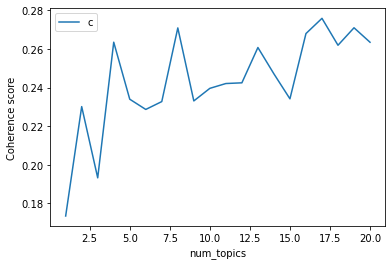

CPU times: user 26.1 s, sys: 484 ms, total: 26.6 s
Wall time: 26.2 s


In [ ]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lda") #HY: text -> texto

For this model it seems that 9 or 18, again we must to check the keywords too.

##**Comparing the Model Coherence of the Best Models**

In [ ]:
ldamodel = lmlist[5]
lsimodel = lmlist_lsi[2]

lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [ ]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

lda_coherence = CoherenceModel(topics=ldatopics, texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


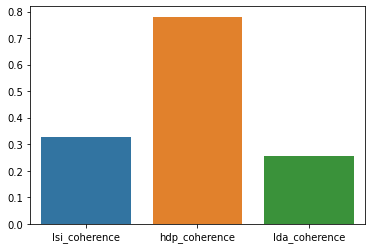

In [ ]:
import seaborn as sns

coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)


We can see that the **LdaModel** model **with 8 topics** has the higher value of
coherence ?????? **[HY: 실제 결과에 따라 수정 필요]**

Examine the keyword to get the topics of the best model

In [ ]:
display_topics(ldamodel)

Topic 0:
tierra mar sue luna corazon campo sombra sol noche bajo 

Topic 1:
agua amor sue tierra tarde mar sol dios hoy dia 

Topic 2:
corazon alma campo espa tarde sue agua tiempo verdad tierra 

Topic 3:
mar espa tierra azul bajo agua sue soria dos mano 

Topic 4:
ojos sombra tarde sue alma amor ayer tierra sol fuente 

Topic 5:
claro corazon sol tarde ana tierra dia viento ojos blanca 



It looks like the topics are: **[HY: 수정필요!!]**

* Topic 0: 
* Topic 1: 
* Topic 2: 
* Topic 3: 
* Topic 4: 
* Topic 5: 
* Topic 6: 
* Topic 7: 
* Topic 8: 
* Topic 9: 



Let´s check the keyword when we selecting another number of topics (14)

In [ ]:
ldamodel_16 =lmlist[16]

In [ ]:
display_topics(ldamodel_16)

Topic 0:
dia sombra tierra tarde corazon claro bien camino busca agua 

Topic 1:
dios sol alma campo bajo amor mano montes olivares mar 

Topic 2:
corazon espa azorin agua primavera alma mar fuego sue alegria 

Topic 3:
sol dia hoy corazon mar viejo torre flor montes claro 

Topic 4:
tierra tarde campo sue viento noche mar sombra parda duero 

Topic 5:
agua tierra dia tarde campo sol sue fuente lleva corazon 

Topic 6:
tierra sue tarde campos camino luna ser amor dos luz 

Topic 7:
claro sue luna tarde olivares viejo tierra dia glu blanca 

Topic 8:
mar agua campo fuente tierra sol dios mano canta luz 

Topic 9:
luna noche camino ojos campo sue sol dos bajo aguarda 

Topic 10:
mar corazon bajo sol sue tierra agua viento tarde ojos 

Topic 11:
agua ojos tierra sol sue claro noche sombra alma fuente 

Topic 12:
espa tic corazon mar tarde agua ana hoy viento alma 

Topic 13:
amor sue tarde hoy tierra fuego ojos luz dios noche 

Topic 14:
sue mar fuerte verdad tiempo corazon cosas amor lir

##**Classifiying all documents**

*  now that we have been select the best model and topics number, is time to assign a topic to each document, means cluster according to the topics



In [ ]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_news['texto'].to_list()) #HY: text -> texto
 


In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.3843,"agua, amor, sue, tierra, tarde, mar, sol, dios...","[sala, familiar, sombria, querido, hermano, su..."
1,1,0.0,0.9853,"tierra, mar, sue, luna, corazon, campo, sombra...","[andado, caminos, abierto, muchas, veredas, na..."
2,2,4.0,0.9677,"ojos, sombra, tarde, sue, alma, amor, ayer, ti...","[plaza, naranjos, encendidos, frutas, redondas..."
3,3,0.0,0.9860,"tierra, mar, sue, luna, corazon, campo, sombra...","[tierra, dieron, tarde, horrible, mes, julio, ..."
4,4,5.0,0.8433,"claro, corazon, sol, tarde, ana, tierra, dia, ...","[tarde, parda, fria, invierno, colegiales, est..."
5,5,4.0,0.8420,"ojos, sombra, tarde, sue, alma, amor, ayer, ti...","[clara, tarde, triste, olienta, tarde, verano,..."
6,6,1.0,0.9906,"agua, amor, sue, tierra, tarde, mar, sol, dios...","[limonero, languido, suspende, palida, rama, p..."
7,7,4.0,0.6921,"ojos, sombra, tarde, sue, alma, amor, ayer, ti...","[escucho, cantos, viejas, cadencias, cantan, c..."
8,8,5.0,0.9878,"claro, corazon, sol, tarde, ana, tierra, dia, ...","[asomado, cig, alto, campanario, girando, torn..."
9,9,0.0,0.9790,"tierra, mar, sue, luna, corazon, campo, sombra...","[desierta, plaza, conduce, laberinto, callejas..."


We selected the ldamodel with 12 topics and asigned a dominant topic to each document, now let map each topic with a label 

first let's create the dictionary

In [ ]:
label_dicc = {0:'TEMA1', 1:'TEMA2', 2:'TEMA3', 3: 'TEMA4', 4:'TEMA5', 5:'TEMA6', 6:'TEMA7', 
              7:'TEMA8', 8:'TEMA9', 9: 'TEMA10', 10:'TEMA11', 11:'TEMA12'}   #HY: 다시 설정 필요!!

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int64')

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].map(label_dicc)
#df_dominant_topic.head(10)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,TEMA2,0.3843,"agua, amor, sue, tierra, tarde, mar, sol, dios...","[sala, familiar, sombria, querido, hermano, su..."
1,1,TEMA1,0.9853,"tierra, mar, sue, luna, corazon, campo, sombra...","[andado, caminos, abierto, muchas, veredas, na..."
2,2,TEMA5,0.9677,"ojos, sombra, tarde, sue, alma, amor, ayer, ti...","[plaza, naranjos, encendidos, frutas, redondas..."
3,3,TEMA1,0.9860,"tierra, mar, sue, luna, corazon, campo, sombra...","[tierra, dieron, tarde, horrible, mes, julio, ..."
4,4,TEMA6,0.8433,"claro, corazon, sol, tarde, ana, tierra, dia, ...","[tarde, parda, fria, invierno, colegiales, est..."
...,...,...,...,...,...
561,561,TEMA6,0.6983,"claro, corazon, sol, tarde, ana, tierra, dia, ...","[angel, sabiasu, secreto, salio, martin, paso,..."
562,562,TEMA3,0.9710,"corazon, alma, campo, espa, tarde, sue, agua, ...","[vio, musa, esquivade, pie, junto, lecho, enlu..."
563,563,TEMA6,0.9558,"claro, corazon, sol, tarde, ana, tierra, dia, ...","[vivi, dormi, creado, penso, martin, turbia, p..."
564,564,TEMA2,0.6532,"agua, amor, sue, tierra, tarde, mar, sol, dios...","[sucedio, angustia, fatigaque, esperar, desesp..."


In [ ]:
df_news['labels'] = df_dominant_topic['Dominant_Topic']

Let's examine some text and its topics.

In [ ]:
#df_news[['texto2', 'labels']].head(10) #HY: text -> texto
df_news[['texto2', 'labels']] #HY: text -> texto

,texto2,labels
0,"Está en la sala familiar, sombría, \ny entre n...",TEMA2
1,"He andado muchos caminos, \nhe abierto muchas ...",TEMA1
2,La plaza y los naranjos encendidos \ncon sus f...,TEMA5
3,Tierra le dieron una tarde horrible \ndel mes ...,TEMA1
4,Una tarde parda y fría \nde invierno. Los cole...,TEMA6
...,...,...
561,El ángel que sabía\nsu secreto salió a Martín ...,TEMA6
562,"Y vio la musa esquiva,\nde pie junto a su lech...",TEMA3
563,"Viví, dormí, soñé y hasta he creado\n—pensó Ma...",TEMA6
564,"Y sucedió a la angustia la fatiga,\nque siente...",TEMA2


In [ ]:
#df_news[ df_news['labels'] == 'family'].head().texto2 #HY: text -> texto
df_news[ df_news['labels'] == 'TEMA5'].head().texto2 #HY: text -> texto

2     La plaza y los naranjos encendidos \ncon sus f...
5     Fue una clara tarde, triste y soñolienta \ntar...
7     Yo escucho los cantos \nde viejas cadencias, \...
14    La calle en sombra. Ocultan los altos caserone...
16    En una tarde clara y amplia como el hastío, \n...
Name: texto2, dtype: object

**Let's see the distribution of topics.**

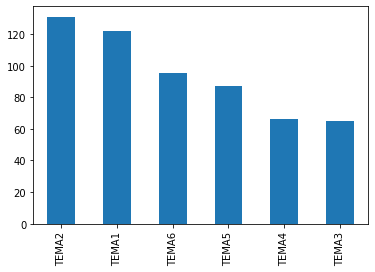

In [ ]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()

The topis are almost balanced, so we are good

finally that we have our models set up, as well as analyzed, we can go ahead to visualizing them.

In [ ]:
!python3 --version #HY: check the current version

Python 3.8.10


In [ ]:
!pip install pyLDAvis==2.1.2

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=c4ad6a47cc74f50baf5eccb3e374f6fe50686bf577b9e5fd6007b6330be066d9
  Stored in directory: /root/.cache/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis
ERROR: Operation cancelled by user


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.7 MB/s eta 0:00:00
  Using cached funcy-1.18-py2.py3-none-any.whl (33 kB)


**A new error happened!**

In [ ]:
import pyLDAvis

pyLDAvis.enable_notebook()

In [ ]:
# %%time
import pyLDAvis.gensim
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.015824 -0.013897       1        1  28.389915
0      0.010214 -0.001932       2        1  24.251808
4     -0.031871 -0.029593       3        1  14.003796
5     -0.005155 -0.023197       4        1  13.919515
2     -0.030306  0.060709       5        1  10.069734
3      0.072943  0.007910       6        1   9.365232, topic_info=      Term        Freq       Total Category  logprob  loglift
385   espa   49.000000   49.000000  Default  30.0000  30.0000
10   claro   46.000000   46.000000  Default  29.0000  29.0000
40     mar  100.000000  100.000000  Default  28.0000  28.0000
158   azul   37.000000   37.000000  Default  27.0000  27.0000
369    ana   45.000000   45.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
72     sol    4.895814   91.213194   Topic6  -5.6628  -0.5567
88   viejo    4.197498   41.603624   Topic6  -5.8167   0.0745
78   tarde    4.387212   91.871346   Topic6  -5.7725  -0.6735
31     hoy    4.138488   54.684380   Topic6  -5.8308  -0.2131
467   ojos    4.122752   62.979249   Topic6  -5.8346  -0.3581

[474 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
301       1  0.269231   abril
301       2  0.235578   abril
301       3  0.302885   abril
301       4  0.067308   abril
301       5  0.100962   abril
...     ...       ...     ...
734       4  0.418013  vuelta
1934      1  0.233179  yuntas
1934      2  0.233179  yuntas
1934      3  0.466359  yuntas
1288      5  0.416838    zumo

[1101 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 6, 3, 4])